In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('./VF_data/region_niedersachsen_tapas_modell.csv')
print(df)

              p_id      hh_id  scheme_id  score_combined  score_finance  \
0        102359869  101232561      62394        0.078162   1.000000e+00   
1        101703905  100912769      46321        0.889043   2.403246e-16   
2        101703905  100912769      46321        0.889043   2.403246e-16   
3        101703905  100912769      46321        0.889043   2.403246e-16   
4        101703905  100912769      46321        0.889043   2.403246e-16   
...            ...        ...        ...             ...            ...   
9012231  101528174  100824986     121136        0.000031   0.000000e+00   
9012232  102359869  101232561      62394        0.078162   1.000000e+00   
9012233  102359869  101232561      62394        0.078162   1.000000e+00   
9012234  102359869  101232561      62394        0.078162   1.000000e+00   
9012235  102359869  101232561      62394        0.078162   1.000000e+00   

         score_time  taz_id_start taz_has_toll_start  block_id_start  \
0          1.000000        

In [4]:
df.columns

Index(['p_id', 'hh_id', 'scheme_id', 'score_combined', 'score_finance',
       'score_time', 'taz_id_start', 'taz_has_toll_start', 'block_id_start',
       'loc_id_start', 'lon_start', 'lat_start', 'taz_id_end',
       'taz_has_toll_end', 'block_id_end', 'loc_id_end', 'lon_end', 'lat_end',
       'start_time_min', 'travel_time_sec', 'mode', 'car_type',
       'distance_bl_m', 'distance_real_m', 'activity', 'is_home',
       'activity_start_min', 'activity_duration_min', 'car_index',
       'is_restricted', 'p_group', 'taz_bbr_type_start', 'bbr_type_home',
       'loc_selection_motive', 'loc_selection_motive_supply'],
      dtype='object')

In [19]:
sample = df[['p_id', 'loc_id_start', 'loc_id_end', 'lon_start', 'lon_end', 'lat_start', 'lat_end', 'distance_real_m', 'activity', 'mode', 'car_type', 'distance_bl_m', 'is_home', 'activity_start_min', 'activity_duration_min', 'start_time_min', 'p_group']].sample(5)

In [20]:
sample

,p_id,loc_id_start,loc_id_end,lon_start,lon_end,lat_start,lat_end,distance_real_m,activity,mode,car_type,distance_bl_m,is_home,activity_start_min,activity_duration_min,start_time_min,p_group
8465248,100483634,218756,-100271721,10.676216,10.780082,52.474407,52.444455,8320.873271,10,2,90,7805.433429,t,1047,325,1044,2
4001247,102305844,-101205468,6652,9.968452,9.950414,52.280414,52.154720,20057.487040,51,2,90,14035.592725,f,703,5,699,11
6087855,102035946,36575,-101074986,9.742171,9.767423,52.373609,52.259329,16858.481277,10,2,114,12827.671097,t,890,510,885,11
6563057,101752633,-100937335,143445,9.597276,9.812242,52.429505,52.366775,25103.895676,522,3,-1,16205.764864,f,1271,45,1266,9
224264,102468283,-101292773,16328,9.856271,9.827866,52.234989,52.334956,14023.066391,740,2,48,11287.115616,f,1140,130,1136,19


In [12]:
df_activities = pd.read_csv('./VF_data/activities.csv')

In [59]:
df_activities[['name_tapas', 'code_tapas', 'name_zbe', 'code_zbe', 'name_mct', 'code_mct']].sort_values('code_zbe')
activity_dict = {}

for i, row in df_activities.iterrows():
    activity_dict[row.code_zbe] = row.name_mct
activity_dict

{50: 'SHOPPING',
 299: 'FREETIME_ACTIVE_AT_HOME',
 300: 'VOLUNTARY_WORK',
 499: 'LUNCH_BREAK_PUPILS',
 212: 'WORKING',
 54: 'SHOPPING',
 51: 'SHOPPING',
 611: 'CONVERSATION_ABOUT_PERSONAL_MATTER',
 80: 'MOVING',
 723: 'PLAYING',
 211: 'WORKING',
 10: 'HOUSEWORK_AT_HOME',
 631: 'VISITING',
 640: 'EXCURSIONS',
 700: 'FREETIME_AT_HOME',
 711: 'TELEVIEWING',
 720: 'DINING_OR_GOING_OUT',
 721: 'SPORTS',
 722: 'PROMENADING',
 55: 'SHOPPING',
 62: 'JOB_SEEKING',
 410: 'SCHOOL',
 411: 'UNIVERSITY',
 213: 'WORKING',
 52: 'SHOPPING',
 53: 'SHOPPING',
 881: 'TRANSPORTING_CHILDREN',
 740: 'FREETIME_ANY',
 511: 'SLEEPING',
 231: 'CONVERSATION_ABOUT_WORK',
 512: 'RELAXING',
 522: 'PERSONAL_MATTERS',
 531: 'EATING_AT_HOME',
 12: 'E_COMMERCE_OUT_OF_HOME',
 533: 'LUNCH_CANTINE',
 412: 'UNIVERSITY',
 724: 'BEING_AT_AN_EVENT',
 799: 'ACTIVITIES_ANY',
 800: 'LEARNING_WITH_CHILDREN',
 880: 'MOVING',
 32: 'HOUSEWORK_OUT_OF_HOME',
 414: 'UNIVERSITY',
 413: 'SCHOOL'}

In [2]:
df = pd.read_parquet('./VF_data/rns_data.parquet')

In [32]:
df_raw = pd.read_csv('./VF_data/region_niedersachsen_tapas_modell.csv')

,p_id,hh_id,scheme_id,score_combined,score_finance,score_time,taz_id_start,taz_has_toll_start,block_id_start,loc_id_start,...,is_home,activity_start_min,activity_duration_min,car_index,is_restricted,p_group,taz_bbr_type_start,bbr_type_home,loc_selection_motive,loc_selection_motive_supply
0,102359869,101232561,62394,0.078162,1.000000e+00,1.000000,2550,f,-1,130378,...,t,950,495,-1,f,2,73,73,0,0
1,101703905,100912769,46321,0.889043,2.403246e-16,0.999094,1896,f,-1,-100912769,...,f,415,1,0,f,17,73,73,0,0
2,101703905,100912769,46321,0.889043,2.403246e-16,0.999094,1896,f,-1,220009,...,t,418,485,0,f,17,73,73,0,0
3,101703905,100912769,46321,0.889043,2.403246e-16,0.999094,1896,f,-1,-100912769,...,f,905,185,0,f,17,73,73,0,0
4,101703905,100912769,46321,0.889043,2.403246e-16,0.999094,2019,f,-1,220132,...,f,1205,1,0,f,17,73,73,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012231,101528174,100824986,121136,0.000031,0.000000e+00,0.000000,1686,f,-1,65468,...,t,1174,240,0,f,15,71,71,0,0
9012232,102359869,101232561,62394,0.078162,1.000000e+00,1.000000,2551,f,-1,-101232561,...,f,739,110,0,f,2,73,73,0,0
9012233,102359869,101232561,62394,0.078162,1.000000e+00,1.000000,2597,f,-1,28,...,f,851,10,0,f,2,72,73,0,0
9012234,102359869,101232561,62394,0.078162,1.000000e+00,1.000000,2639,f,-1,220752,...,t,865,30,0,f,2,72,73,0,0


In [37]:
df['activity'] = df_raw.sort_values(['p_id', 'start_time_min']).activity.values

In [60]:
df['activity_name_mct'] = df.activity.map(activity_dict)
df

,p_id,loc_id_end,activity_start_min,activity_end_min,p_group,activity,activity_name_zbe,activity_name_mct
0,0,70117,495,1050,4,212,WORKING FULL TIME,WORKING
1,0,154421,1073,1183,4,721,SPORTS,SPORTS
2,0,100000000,1196,1456,4,10,HOUSEWORK_AT_HOME,HOUSEWORK_AT_HOME
3,1,47841,481,786,10,213,WORKING PART TIME,WORKING
4,1,100000001,805,1095,10,10,HOUSEWORK_AT_HOME,HOUSEWORK_AT_HOME
...,...,...,...,...,...,...,...,...
9012231,2551681,101331931,985,1430,1,10,HOUSEWORK_AT_HOME,HOUSEWORK_AT_HOME
9012232,2551682,123134,430,840,1,410,SCHOOL,SCHOOL
9012233,2551682,101331931,850,1440,1,10,HOUSEWORK_AT_HOME,HOUSEWORK_AT_HOME
9012234,2551683,5144,465,700,1,410,SCHOOL,SCHOOL


In [40]:
locations = df.groupby('loc_id_end').size().sort_values(ascending=False).index.values

In [84]:
df.activity_name_mct.value_counts()

activity_name_mct
HOUSEWORK_AT_HOME        3848295
WORKING                  1233574
SHOPPING                  994665
PERSONAL_MATTERS          687432
FREETIME_ANY              549657
ACTIVITIES_ANY            459486
VISITING                  265963
PROMENADING               225810
SPORTS                    187383
SCHOOL                    184818
DINING_OR_GOING_OUT       129437
UNIVERSITY                 91458
EXCURSIONS                 64993
BEING_AT_AN_EVENT          39955
VOLUNTARY_WORK             32936
TRANSPORTING_CHILDREN      10390
PLAYING                     5984
Name: count, dtype: int64

In [83]:
df[df.loc_id_end == locations[920_000]].activity_name_mct.value_counts()

activity_name_mct
HOUSEWORK_AT_HOME    2
Name: count, dtype: int64

In [7]:
tmin, tmax = df.activity_start_min.min().astype('int'), df.activity_end_min.max().astype('int')
print(abs(tmin), tmax)

21708 32069


In [86]:
def count_nodes_per_location(location):
    # Takes df that contains trajectories leading to a choosen location
    nodes_per_location = np.zeros(abs(tmin) + tmax)
    starts = location.activity_start_min.values + abs(tmin)
    ends = location.activity_end_min.values + abs(tmin)
    activity = location.activity_name_mct.mode()[0]

    for s, e in zip(starts, ends):
        nodes_per_location[s: e] += 1
    
    return nodes_per_location, activity

#count_nodes_per_location(df[df.loc_id_end == 63584])

{'VOLUNTARY_WORK': 8, 'ACTIVITIES_ANY': 183, 'BEING_AT_AN_EVENT': 8, 'SPORTS': 13, 'VISITING': 4}


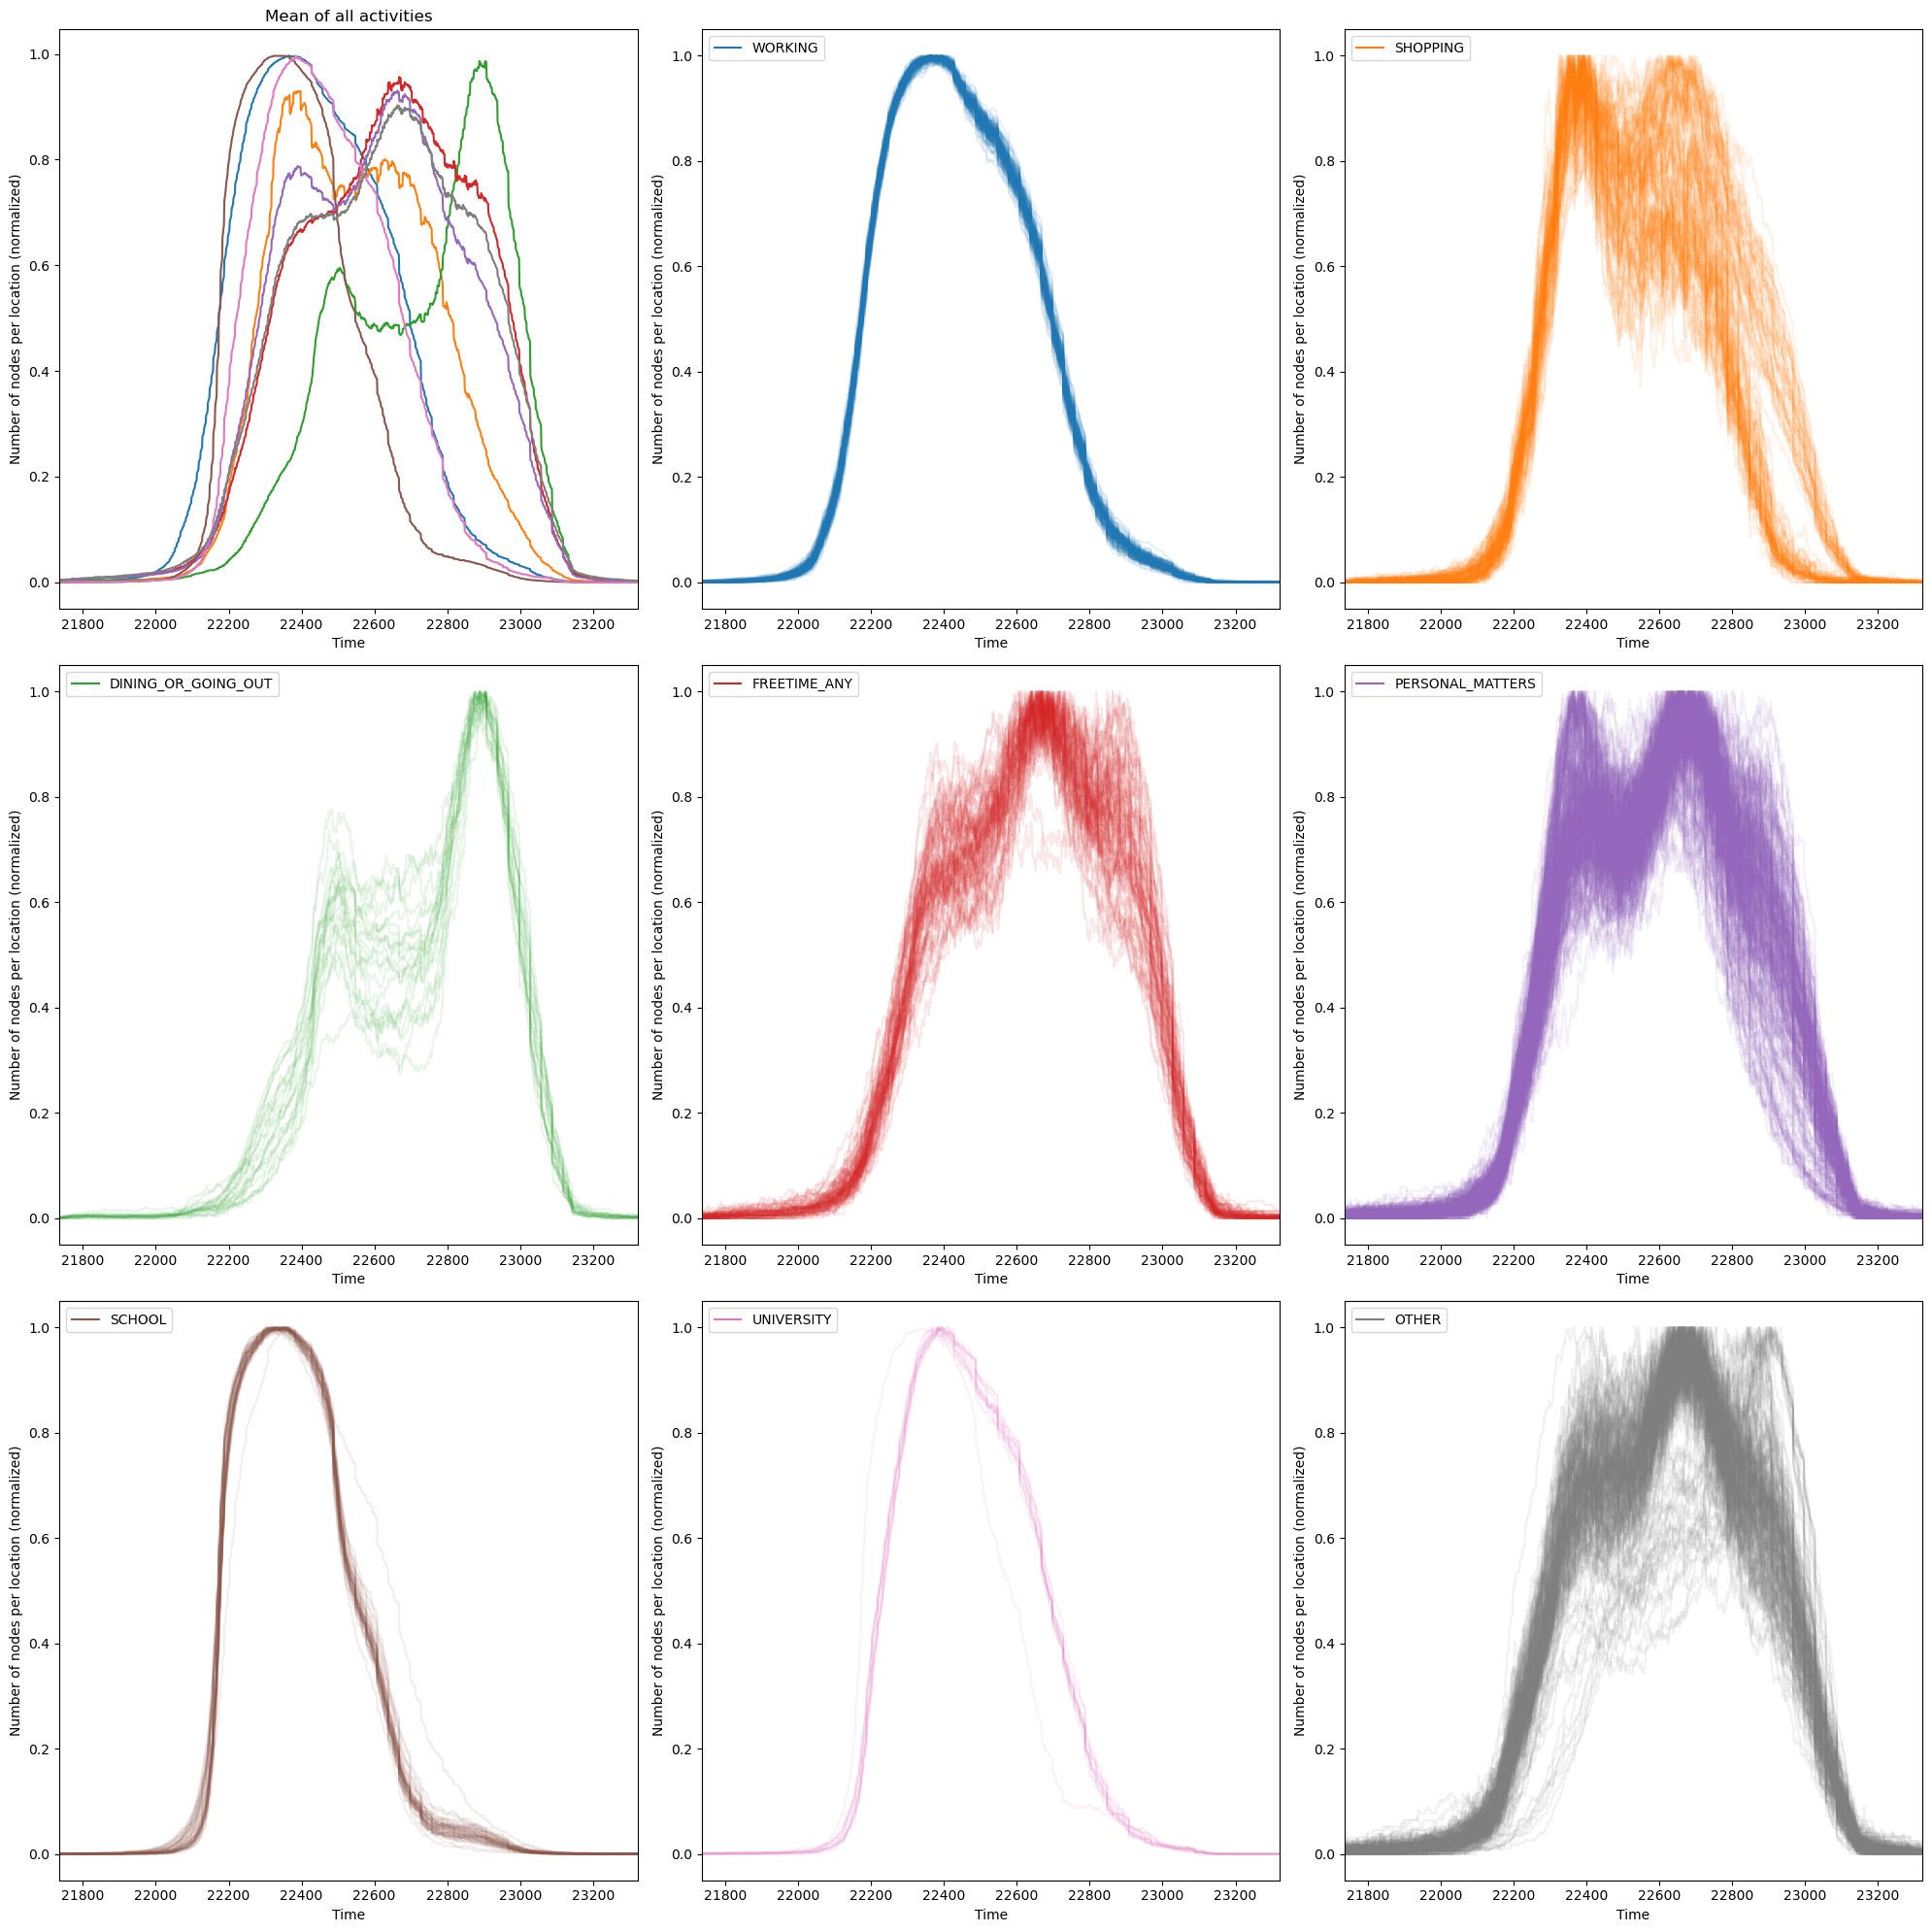

In [147]:
xlim = df.activity_start_min.quantile([0.001, .999]).values + abs(tmin)
T = np.arange(0, tmax + abs(tmin), 1)

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
axs = axs.flatten()

default_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
color_dict = {'WORKING': default_colors[0], 'SHOPPING': default_colors[1], 'DINING_OR_GOING_OUT': default_colors[2], 'FREETIME_ANY': default_colors[3], 'PERSONAL_MATTERS': default_colors[4],
              'SCHOOL': default_colors[5], 'UNIVERSITY': default_colors[6], 'OTHER': default_colors[7]}
axs_dict = dict(zip(color_dict.keys(), range(1, 9)))

possible_activities = list(color_dict.keys())
others = {}
all_counts = {'WORKING': [], 'SHOPPING': [], 'DINING_OR_GOING_OUT': [], 'FREETIME_ANY': [], 'PERSONAL_MATTERS': [], 'SCHOOL': [], 'UNIVERSITY': [], 'OTHER': []}

for i in range(1000):
    counts, activity = count_nodes_per_location(df[df.loc_id_end == locations[i]])
    counts = counts/counts.max()

    if activity not in possible_activities:
        try:
            others[activity] += 1
        except KeyError:
            others[activity] = 1
        activity = 'OTHER'
        
    #axs[0].plot(T, counts, alpha=.5, color=color_dict[activity])
    all_counts[activity].append(counts)
    axs[axs_dict[activity]].plot(T, counts, alpha=.1, color=color_dict[activity])



for action, color in color_dict.items():
    axs[0].plot(T, np.array(all_counts[action]).mean(axis=0), alpha=1, color=color_dict[action], label=action)
    axs[axs_dict[action]].plot([0], [0], alpha=1, color=color_dict[action], label=action)


axs[0].set_title('Mean of all activities')
for i, ax in enumerate(axs):
    ax.set(xlabel='Time', ylabel='Number of nodes per location (normalized)', xlim=xlim)

    if i > 0:
        ax.legend(loc='upper left')

print(others)
plt.tight_layout()
plt.savefig('./plots/rns_nodes_per_location.png')